#Técnicas pre-modelo por Sergio Maza y Lucía Doval

El análisis exploratorio de datos (EDA) y la visualización son herramientas fundamentales para interpretar y descubrir patrones ocultos en nuestros datos. Estas técnicas nos permiten identificar características clave y representaciones significativas, incluso en conjuntos de datos grandes, mediante métodos de reducción de dimensionalidad como PCA (Análisis de Componentes Principales) y t-SNE (t-distributed Stochastic Neighbor Embedding).

Las técnicas de interpretabilidad previas al modelo son independientes del modelo en sí, ya que se centran únicamente en los datos. Este tipo de interpretabilidad suele llevarse a cabo antes de la selección del modelo, lo cual es crucial para adquirir una comprensión profunda de los datos antes de tomar decisiones sobre el enfoque modelístico. Algunas propiedades que contribuyen a la interpretabilidad son la presencia de características intuitivas y significativas, así como un número reducido de características.

Ahora, procederemos a realizar un análisis exploratorio de datos para examinar la distribución y la correlación de nuestras variables.

##INDICE:
1. Importación de bibliotecas

2. Carga del dataset

3. Limpieza de datos

4. Visualización del dataset

5. Perfilado del dataset (YData Profiling)

6. Análisis de modelos

    6.1 Modelos de regresión

    6.2 Modelos de clasificación


# Imports

In [ ]:
import numpy as np # Importamos la librería NumPy, que se usa principalmente para trabajar con arreglos (arrays) y operaciones matemáticas de alto rendimiento.
import pandas as pd # Importamos Pandas, una librería fundamental para la manipulación y análisis de datos, en especial para trabajar con estructuras de datos como DataFrames.
import matplotlib.pyplot as plt # Importamos matplotlib.pyplot, que se utiliza para crear gráficos y visualizaciones en 2D de forma fácil.
import seaborn as sns # Importamos seaborn, una librería de visualización de datos en Python.
from sklearn import metrics  # Importa el módulo 'metrics' de scikit-learn para evaluar el rendimiento del modelo.
from sklearn.metrics import accuracy_score, roc_curve, auc # Importa funciones específicas para calcular la precisión, la curva ROC y el AUC.

# Dataset

Antes de nada, ¿sabemos responder a la pregunta sobre qué es un dataset? En caso de que no, un dataset (o conjunto de datos) es una colección organizada de datos que suele estar estructurada en forma de una tabla, donde cada fila representa una instancia o registro y cada columna representa una característica o variable relacionada con esos registros. Los datasets se utilizan en una amplia variedad de contextos, desde análisis de datos hasta entrenamientos de modelos de inteligencia artificial o machine learning.

In [ ]:
#Importamos el csv con la ruta deseada, puede ser local si estais utilizando jupyter, por ejemplo, en este caso se trata de un link a un archivo en drive
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1x-UWg2wr9GmFVnZSL5HDuaM-CfLBYZzG')
df.head() #Con esta instrucción podemos ver la cabecera de nuestros datos

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ID,Fecha/hora inicio,ph,Turbidez,Utilizada
1,23024,3/26/23 5:00,"5,496","28,32",yes
2,23025,3/17/23 6:00,"5,48","26,56",yes
3,23026,3/17/23 6:00,"5,48","26,56",yes
4,23027,4/2/23 5:00,"5,384","33,84",yes


## Nombre de las columnas

Lo primero que deberíamos hacer a la hora de trabajar con un dataset es conocer bien nuestros datos, sin embargo, podemos ver que el nombre de las columnas es "Unnamed: X", eso se debe a que el csv esta mal creado y los nombres de las columnas estan en la fila 2. Se podría cambiar el nombre de las columnas, pero la solución mas optima es leer el csv desde la fila 2, esto lo podemos hacer con **pd.read_csv('url', header = 1)**

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1x-UWg2wr9GmFVnZSL5HDuaM-CfLBYZzG', header = 1)
df.head()

,ID,Fecha/hora inicio,ph,Turbidez,Utilizada
0,23024,3/26/23 5:00,"5,496","28,32",yes
1,23025,3/17/23 6:00,"5,48","26,56",yes
2,23026,3/17/23 6:00,"5,48","26,56",yes
3,23027,4/2/23 5:00,"5,384","33,84",yes
4,23028,4/2/23 5:00,"5,384","33,84",yes


Ahora que ya vemos bien nuestros datos pasemos a describirlos, es importante conocer la naturaleza de cada columna en nuestro dataset, para ser capaces de discernir si son necesarias o no en nuestro futuro entrenamiento, normalmente, estas columnas están descritas en la documentación de donde sacamos el dataset, de no ser así, deberemos hacer una investigación más exahustiva para saber a qué se refiere cada una de las columnas.

##Descripción del Dataset

Este dataset simula datos generados en un proceso de creación de una vacuna, donde el **pH** y la **turbidez** de diferentes muestras influyen en la decisión de utilizarla para eventualmente crear un antígeno.

###Columnas:
- **ID**: Es un identificador único para cada registro o muestra. Sirve únicamente para diferenciar las filas y no tiene valor predictivo o científico en el análisis.
- **Fecha/hora inicio**: Indica la fecha y hora en que se registraron los datos de la muestra. Puede ser útil para detectar patrones temporales o tendencias en la evolución del proceso. Sin embargo, es importante evaluar si se usará para análisis de series temporales o simplemente como referencia.
- **pH**: Mide la acidez o alcalinidad de la muestra. En este caso, es un valor numérico y es una variable clave en el análisis. El pH influye en las condiciones de cultivo y en la decisión de seguir o no con la muestra para la creación de un antígeno.
- **Turbidez**: Mide la claridad o transparencia de la solución, lo cual indica la concentración de partículas en suspensión. Es otra variable numérica importante para el análisis, ya que puede influir en la calidad del cultivo.
- **Utilizada**: Es una variable categórica que indica si la muestra fue seleccionada ("yes") para continuar con el cultivo. Esta columna actúa como un indicador binario (sí/no), que será el objetivo en futuras predicciones: predecir si, en función del pH y la turbidez, una muestra será utilizada.

# Cleaning Data

Ahora que conocemos bién cada una de las columnas de nuestro dataset, podemos empezar a limpiarlo y analizarlo

## Variables categóricas -> numéricas

La columna 'Utilizada' es la única a simple vista que no contiene valores numericos.

In [ ]:
# Sacamos las clases de la columna 'Utilizada'
df['Utilizada'].unique()

array(['yes', 'no'], dtype=object)

Analizando esa columna podemos averiguar que se trata de una respuesta booleana yes/no, que la podremos sustituir por 0/1. Esto nos los facilita la herramienta de sklearn **Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Utilizada'] = label_encoder.fit_transform(df['Utilizada'])
df['Utilizada'].unique()

array([1, 0])

##Pasar los tipos de datos a numéricos

Para poder entrenar un modelo, es importante que los datos de nuestras columnas estén todos en numérico

In [ ]:
df.dtypes # Tipos de dato de las columnas

,0
ID,int64
Fecha/hora inicio,object
ph,object
Turbidez,object
Utilizada,int64


A pesar de haber pasado la columna 'Utilizada' de categórica a númerica. Con el **df.dtypes** vemos que hay 3 columnas que siguen siendo de tipo "object".

La columna 'Fecha/hora inicio' tiene sentido ya que es una fecha, pero el resto no. Asi que vamos a pasarlas a float

In [ ]:
# Lista de columnas para convertir a float
columns_to_convert = ['ph', 'Turbidez']

# Convertir esas columnas a float
df[columns_to_convert] = df[columns_to_convert].astype(float)
df.head(10)

ValueError: could not convert string to float: '5,496'

Cuando lo intentamos pasar a float vemos que nos da un error. El error se debe a que se esta utilizando una ',' en vez de un '.' Ese podía ser el motivo por el cual lo hacia ser de tipo 'object' en vez de float.

In [ ]:
 # Lista de columnas para convertir a float
columns_to_convert = ['ph', 'Turbidez']

# Reemplazar ',' -> '.'
df[columns_to_convert] = df[columns_to_convert].replace(',', '.', regex=True)

# Convertir esas columnas a float
df[columns_to_convert] = df[columns_to_convert].astype(float)
df.dtypes

,0
ID,int64
Fecha/hora inicio,object
ph,float64
Turbidez,float64
Utilizada,int64


##Valores nulos

Ya tenemos todos los tipos de datos que nos interesan por lo que ahora vamos a tratar los **valores nulos**. Primero veremos cuantos hay y en que columnas están:

In [ ]:
nan_per_column = df.isna().sum()
print(nan_per_column)

ID                   0
Fecha/hora inicio    0
ph                   2
Turbidez             2
Utilizada            0
dtype: int64


Vemos que solo hay 2 valores nulos tanto en el ph como en la turbidez. Antes de nada, tenemos que preguntarnos ¿Tiene sentido que existan valores nulos en estas columnas? En nuestro caso la respuesta es no.

Hay muchas maneras de enfrentar los valores nulos, en este caso como tenemos suficientes datos, son pocos los valores nulos, y son datos necesarios para saber si el producto final se ha aceptado o no; decidimos aproximarlos a la media:

In [ ]:
# Lista de columnas para NaN -> mean
columns_to_convert = ['ph', 'Turbidez']

# Reemplazar los NaN por la media de cada columna
df[columns_to_convert] = df[columns_to_convert].apply(lambda col: col.fillna(col.mean()))
print(df.isna().sum())

ID                   0
Fecha/hora inicio    0
ph                   0
Turbidez             0
Utilizada            0
dtype: int64


###Técnicas para eliminar valores nulos

Eliminar o tratar los **valores nulos** (o valores faltantes) es una tarea esencial durante la limpieza de datos. Dependiendo de la naturaleza del dataset y del problema que estás resolviendo, hay varias formas de manejar los valores nulos. Aquí te explico algunas estrategias comunes para tratarlos:

### 1. **Eliminar Filas o Columnas con Valores Nulos**

Esta es una estrategia directa, pero puede ser útil si los valores faltantes no son muchos o si la información que se pierde no es importante.

- **Eliminar Filas**: Si una fila tiene uno o más valores nulos y esa fila no es crucial para tu análisis, puedes eliminarla completamente.

    ```python
    df.dropna(axis=0, inplace=True)  # Elimina las filas con valores nulos
    ```

- **Eliminar Columnas**: Si una columna tiene muchos valores nulos y no parece ser útil o crucial para el análisis, se puede eliminar.

    ```python
    df.dropna(axis=1, inplace=True)  # Elimina las columnas con valores nulos
    ```

Este método debe usarse con precaución, ya que podrías estar perdiendo información valiosa si eliminas demasiados datos.

### 2. **Imputación de Valores Faltantes**

Otra estrategia más sofisticada es **imputar** (rellenar) los valores nulos con valores calculados o aproximados en lugar de eliminarlos.

- **Imputación con la Media, Mediana o Moda**:
  - Para columnas numéricas:
    - **Media**: Útil cuando los datos están distribuidos de manera normal o aproximadamente normal.
      ```python
      df['columna'] = df['columna'].fillna(df['columna'].mean())  # Rellena con la media
      ```
    - **Mediana**: Mejor si los datos tienen una distribución sesgada.
      ```python
      df['columna'] = df['columna'].fillna(df['columna'].median())  # Rellena con la mediana
      ```
  - Para columnas categóricas:
    - **Moda**: La moda es el valor más frecuente en una columna, útil para datos categóricos.
      ```python
      df['columna'] = df['columna'].fillna(df['columna'].mode()[0])  # Rellena con la moda
      ```

- **Imputación Basada en Modelos**:
  - Para imputar valores nulos de una forma más avanzada, puedes utilizar modelos de machine learning (como K-Nearest Neighbors o Regresión Lineal) para predecir los valores faltantes en función de las otras variables. Existen librerías como **`IterativeImputer`** de `scikit-learn` que permiten hacer esto automáticamente.

### 3. **Rellenar con un Valor Constante**

A veces es útil rellenar los valores nulos con un valor constante que tenga sentido en el contexto del problema.

- Para columnas numéricas:
  ```python
  df['columna'] = df['columna'].fillna(0)  # Rellena con 0
  ```

- Para columnas categóricas:
  ```python
  df['columna'] = df['columna'].fillna('Desconocido')  # Rellena con una etiqueta como 'Desconocido'
  ```

### 4. **Rellenar hacia Adelante o hacia Atrás (Forward/Backward Fill)**

Este método es útil para datos de series temporales o cuando los valores cercanos en el tiempo están relacionados.

- **Forward Fill**: Rellena los valores nulos con el valor anterior no nulo.
  ```python
  df['columna'] = df['columna'].fillna(method='ffill')  # Rellena con el valor anterior
  ```

- **Backward Fill**: Rellena los valores nulos con el siguiente valor no nulo.
  ```python
  df['columna'] = df['columna'].fillna(method='bfill')  # Rellena con el siguiente valor
  ```

### 5. **Interpolación**

La interpolación es una técnica para rellenar valores nulos calculando un valor intermedio en función de los valores adyacentes. Es especialmente útil para datos numéricos y series temporales.

```python
df['columna'] = df['columna'].interpolate()  # Interpolación lineal
```

Puedes ajustar el método de interpolación, como `polynomial`, `spline`, o `time` para series temporales.

### 6. **Usar Variables Indicadoras (Flags)**

Otra técnica es crear una columna indicadora que registre si el valor era originalmente nulo. Esto puede ser útil en algunos modelos de machine learning para no perder la información de que un valor estaba faltante.

```python
df['columna_null'] = df['columna'].isnull()  # Nueva columna que indica si el valor es nulo
df['columna'] = df['columna'].fillna(0)  # Luego rellenas con un valor adecuado
```

### Elección del Método

La elección de la técnica depende de varios factores:
- **Cantidad de valores nulos**: Si hay pocos valores nulos, eliminarlos podría ser suficiente. Si hay muchos, la imputación es una mejor opción.
- **Tipo de datos**: La imputación con la media o la mediana funciona bien para variables numéricas, pero para variables categóricas la moda o un valor constante es mejor.
- **Impacto en el análisis**: Si una columna es crítica, es mejor intentar imputar sus valores. Si no es crucial, puede eliminarse.

Estas técnicas aseguran que los valores nulos no introduzcan sesgos o errores en tu análisis o modelo de machine learning.

##Duplicados

A continuación miraremos si contamos con valores duplicados en nuestro dataset

In [ ]:
duplicados = df.duplicated()  # Devuelve una serie booleana indicando si cada fila es un duplicado o no
df[duplicados]  # Muestra solo las filas duplicadas

,ID,Fecha/hora inicio,ph,Turbidez,Utilizada
114,24020,1/25/24 0:30,5.448,35.04,1


Podemos ver que tenemos una fila de datos duplicados, sin embargo también podemos verificar el numero de columnas duplicadas basandonos en un dato concreto

In [ ]:
# Verificar duplicados basados en dos columnas específicas
duplicados = df.duplicated(subset=['ph', 'Turbidez'])

# Contar cuántas filas están duplicadas
num_duplicados = duplicados.sum()

print(f"Número de filas duplicadas: {num_duplicados}")

Número de filas duplicadas: 71


In [ ]:
df.shape #Esta instrucción nos muestra el tamaño total de nuestro dataset, el primer numero son las filas y el segundo las columnas

(164, 5)

Como vemos, tenemos demasiados datos duplicados como para borrarlos, esto también se debe a que es un dataset inventado, en este caso, no borraremos los datos duplicados de esas columnas, veremos posteriormente como nos enfrentaremos al problema de tener muchos duplicados. Si nos encontraramos con esta situación en un caso real tendríamos que tratar estos datos duplicados con cuidado, aquí dejamos una serie de recomendaciones:
- Entender la causa de los duplicados: Asegúrate de que sabes por qué existen esos duplicados y si son válidos o errores.
- Eliminar si no son útiles: Si los duplicados son irrelevantes o representan un error, elimínalos.
- Agrupar y resumir: Si los duplicados representan información útil, agrúpalos y resume los valores.
- Crear una columna de peso: Si la frecuencia de duplicación es importante, conserva los duplicados pero añade una columna que refleje cuántas veces aparecen.
- Cuidado con el sesgo: Si usas duplicados en modelos de machine learning, ten en cuenta que podrían causar sesgo o sobreajuste.

In [ ]:
df.drop_duplicates(inplace=True) #borraremos solo los datos que tienen todas las columnas repetidas

#quiero agrupar todos los datos repetidos y crear una columna de frecuencia
df['Frecuencia'] = df.groupby(['ph', 'Turbidez']).cumcount() + 1
df.head()

,ID,Fecha/hora inicio,ph,Turbidez,Utilizada,Frecuencia
0,23024,3/26/23 5:00,5.496,28.32,1,1
1,23025,3/17/23 6:00,5.480,26.56,1,1
2,23026,3/17/23 6:00,5.480,26.56,1,2
3,23027,4/2/23 5:00,5.384,33.84,1,1
4,23028,4/2/23 5:00,5.384,33.84,1,2


## Shuffle

Una vez tenemos limpio nuestro dataset tenemos que evitar sesgos. Para ello vamos a mezclar los datos, pero *¿Por qué hacemos esto?*

1. Evitar el Sesgo en el Modelo
Cuando los datos están ordenados de una manera específica (por ejemplo, por tiempo, categorías o alguna otra característica), un modelo puede aprender patrones sesgados que no generalizan bien a datos nuevos. Al mezclar los datos:

- Se minimiza el sesgo: Los datos se distribuyen de manera más uniforme en el conjunto de entrenamiento, evitando que el modelo aprenda patrones específicos del orden original.
2. Aumentar la Generalización
Al mezclar los datos, se ayuda al modelo a generalizar mejor. Esto significa que:

- Mejora la capacidad de hacer predicciones sobre datos no vistos: El modelo se entrena en una variedad más amplia de ejemplos, lo que ayuda a que no se ajuste demasiado a las características de un subconjunto de datos.
3. Asegurar Representatividad en Cada Batch
En algoritmos de aprendizaje por lotes (batch learning) o aprendizaje por mini-lotes (mini-batch learning), mezclar los datos garantiza que cada batch de datos que se utiliza para el entrenamiento contenga una representación equilibrada de todas las clases o patrones en el dataset.

- Reducción de varianza: Esto puede ayudar a que el modelo tenga un entrenamiento más estable y menos sensible a variaciones aleatorias en los datos.
4. Mejorar la Eficiencia del Entrenamiento
En algunos casos, especialmente en algoritmos que utilizan técnicas de optimización como el descenso de gradiente, mezclar los datos puede llevar a una convergencia más rápida. Esto se debe a que el algoritmo se expone a diferentes ejemplos en cada iteración, lo que puede ayudar a mejorar la dinámica del entrenamiento.

5. Evitar el Problema de Overfitting
Si hay patrones específicos en los datos de entrenamiento (por ejemplo, si ciertos tipos de datos son más prevalentes que otros), un modelo podría aprender esos patrones específicos (overfitting). Al mezclar los datos:

- Se diversifican las muestras: Esto ayuda a que el modelo no se enfoque en características específicas que solo aparecen en un orden particular.
###Ejemplo de Situaciones en las que Hacer Shuffle es Crítico
- Conjuntos de datos por tiempo: En series temporales, si tus datos están organizados cronológicamente y no se mezclan, un modelo podría no captar adecuadamente patrones que son válidos en todo el rango de datos.

- Conjuntos de datos desbalanceados: Si una clase es mucho más prevalente que otra, mezclar los datos asegura que, durante el entrenamiento, el modelo vea ejemplos de todas las clases, ayudando a evitar que aprenda a predecir solo la clase dominante.

- **frac**: filas que quieres mezclar, siendo 1 el 100%, 0.5 el 50%, etc
- **random_state**: Semilla generadora. Al fijar una siempre se va a mezclar de la misma forma, si no la especificamos, cada vez que ejecutemos se mezclara de formas diferentes

In [ ]:
# Shuffle de los datos de entrenamiento
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,ID,Fecha/hora inicio,ph,Turbidez,Utilizada,Frecuencia
0,24064,4/21/24 0:30,5.360,25.84,1,2
1,24014,2/8/24 0:30,5.488,34.88,1,1
2,24057,4/14/24 0:30,5.504,27.12,1,2
3,23081,9/10/23 5:00,5.496,28.40,1,1
4,23127,11/26/23 0:30,5.432,29.20,1,2


## Normalizar

Normalización se refiere a ajustar los valores de las características (features) de un conjunto de datos de manera que se encuentren en una escala común, lo que facilita el análisis y el modelado. Esto es especialmente útil cuando las características tienen diferentes unidades de medida o escalas. Por ejemplo, si tienes una característica que mide el ingreso en miles de dólares y otra que mide la edad en años, sus magnitudes son muy diferentes.

Esto puede influir de mala manera en la importancia que le da el modelo a los datos, por ejemplo, en el ejemplo dado anteriormente, el ingreso de dolares tendría mucho más peso que la edad en años, sobretodo en algoritmos basados en distancias, como el KNN o Kmeans, además, en algoritmos basados en gradientes, tener los datos normalizados permite al modelo converger más rapidamente. Además de que tener nuestros datos normalizados mejora la interpretabilidad ya que podemos ver más facilmente que características influyen en el modelo.

Existen varios metodos de normalización, los más comunes son los siguientes:

1. Min-Max Scaling:

Esta técnica transforma los datos para que estén en un rango específico, generalmente de 0 a 1, es el algoritmo que usaremos nosotros. Se utiliza la siguiente fórmula:

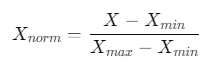

Esto significa que el valor mínimo se convierte en 0 y el máximo se convierte en 1.
2. Z-Score Normalization (Estandarización):

Esta técnica transforma los datos para que tengan una media de 0 y una desviación estándar de 1. La fórmula es:

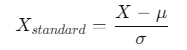

Donde
𝜇
μ es la media y
𝜎
σ es la desviación estándar de la característica.
3. Robust Scaling:

Esta técnica es útil para datos con outliers. Utiliza la mediana y el rango intercuartil (IQR) para escalar los datos:

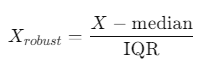



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos las columnas que queremos escalar
columns_to_scale = ['ph', 'Turbidez']

scaler = MinMaxScaler()
df[['ph', 'Turbidez']] = scaler.fit_transform(df[columns_to_scale])
df.head()

,ID,Fecha/hora inicio,ph,Turbidez,Utilizada,Frecuencia
0,24064,4/21/24 0:30,0.122137,0.164420,1,2
1,24014,2/8/24 0:30,0.244275,0.469003,1,1
2,24057,4/14/24 0:30,0.259542,0.207547,1,2
3,23081,9/10/23 5:00,0.251908,0.250674,1,1
4,23127,11/26/23 0:30,0.190840,0.277628,1,2


En este punto ya hemos hecho lo siguiente:
- Variables categóricas a numéricas
- Parsear las columnas necesarias de 'object' a 'float'
- Tratamiento de valores nulos
- Eliminar valores duplicados
- Shuffle de datos
- Normalización

Ya tenemos listo nuestro dataset y ya podemos visualizarlo

# Visualizar dataset

Es importante saber visualizar el dataset para saber como funcionan nuestros datos

In [ ]:
type(df) # Tipo de dato del dataset

pandas.core.frame.DataFrame

In [ ]:
df.columns # Nombre de las columnas

Index(['ID', 'Fecha/hora inicio', 'ph', 'Turbidez', 'Utilizada', 'Frecuencia'], dtype='object')

In [ ]:
df.iloc[0] # Visualizacion de un dato

,0
ID,24064
Fecha/hora inicio,4/21/24 0:30
ph,0.122137
Turbidez,0.16442
Utilizada,1
Frecuencia,2


In [ ]:
df.describe() # Estadisticas del dataset

,ID,ph,Turbidez,Utilizada,Frecuencia
count,163.000000,163.000000,163.000000,163.000000,163.000000
mean,23446.055215,0.225687,0.345140,0.803681,1.429448
std,475.092665,0.101642,0.185522,0.398437,0.496523
min,23024.000000,0.000000,0.000000,0.000000,1.000000
25%,23067.500000,0.167939,0.212938,1.000000,1.000000
50%,23111.000000,0.221374,0.323450,1.000000,1.000000
75%,24042.500000,0.267176,0.433962,1.000000,2.000000
max,24111.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
df.info() # Informacion del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 163 non-null    int64  
 1   Fecha/hora inicio  163 non-null    object 
 2   ph                 163 non-null    float64
 3   Turbidez           163 non-null    float64
 4   Utilizada          163 non-null    int64  
 5   Frecuencia         163 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 7.8+ KB


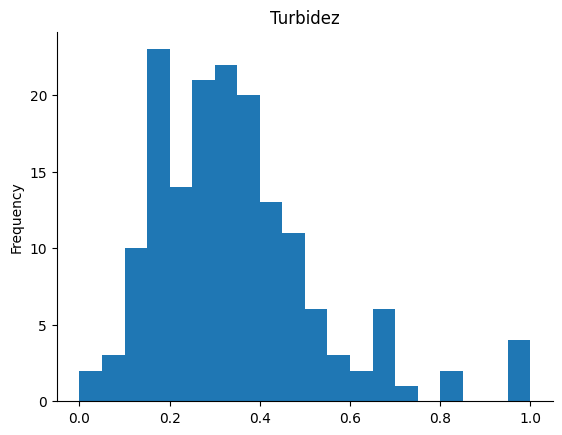

In [ ]:
# @title Turbidez

from matplotlib import pyplot as plt
df['Turbidez'].plot(kind='hist', bins=20, title='Turbidez')
plt.gca().spines[['top', 'right',]].set_visible(False)

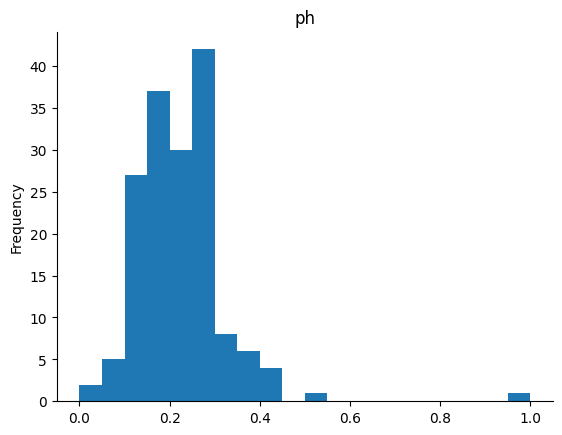

In [ ]:
# @title ph

from matplotlib import pyplot as plt
df['ph'].plot(kind='hist', bins=20, title='ph')
plt.gca().spines[['top', 'right',]].set_visible(False)

['ID', 'Fecha/hora inicio', 'ph', 'Turbidez', 'Frecuencia']


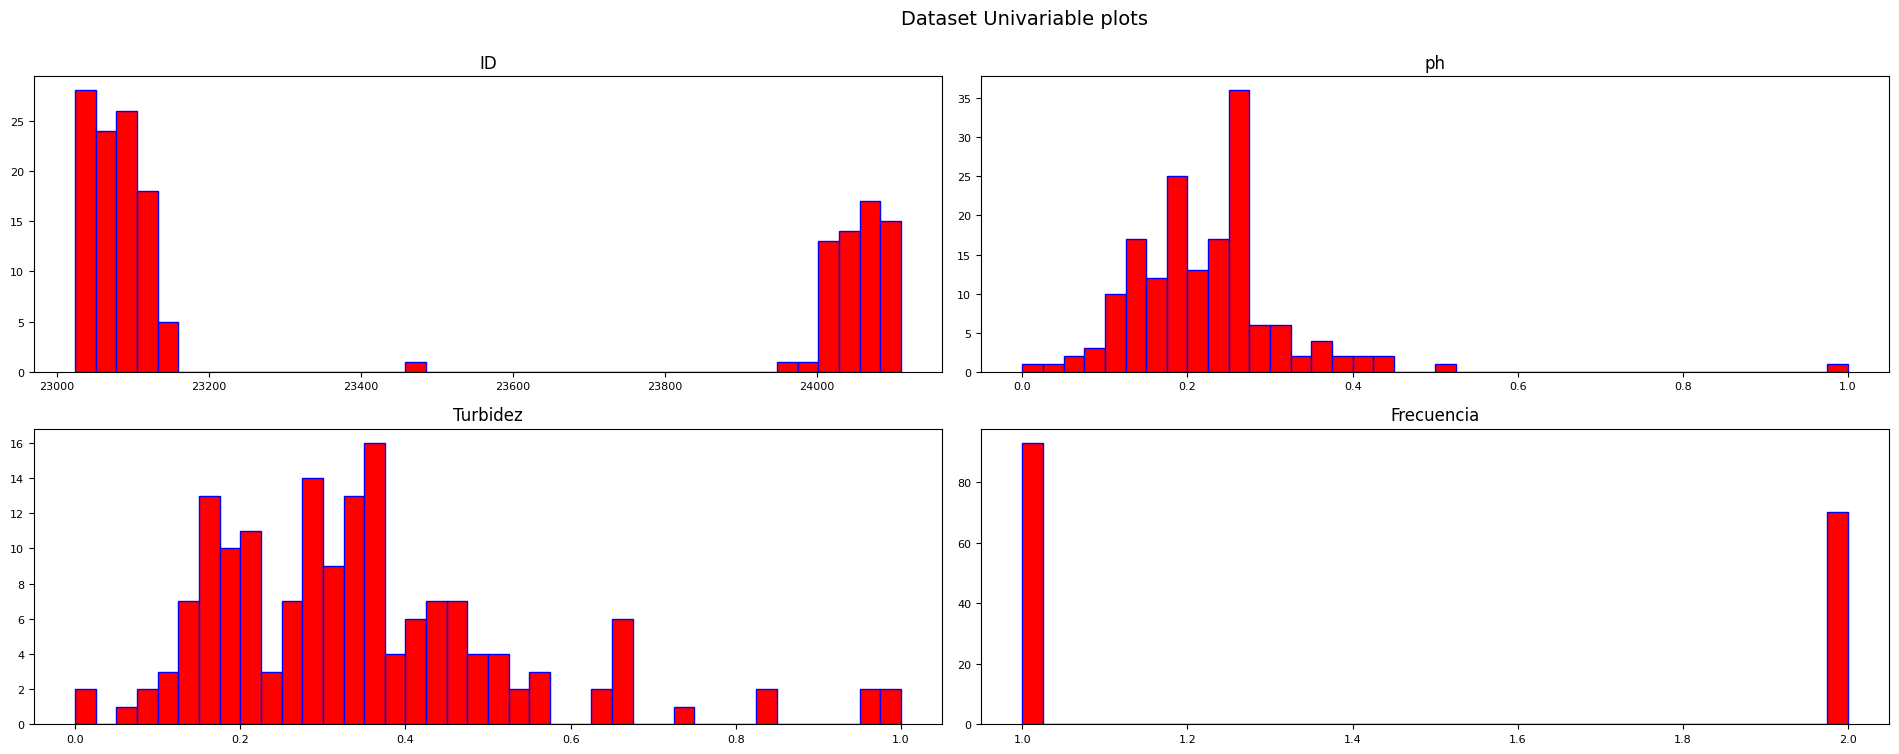

In [ ]:
# Extrayendo nuestra variable objetivo 'Utilizada'
# y creando una lista de características útiles de las variables dependientes
target = 'Utilizada'
features_list = list(df.columns)
features_list.remove(target)
print(features_list)

df[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False,
                          figsize=(16,6), color='red')
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.suptitle('Dataset Univariable plots', x=0.65, y=1.25, fontsize=14);

A partir de estos graficos tenemos lo necesario para realizar un análisis univariante, es decir, sacar conclusiónes de una variable en un conjunto de datos.

###Objetivos del Análisis Univariante
- Describir la Variable:Proporciona un resumen de las características básicas de la variable, como su media, mediana, moda, rango, varianza y desviación estándar.
- Identificar la Distribución:Ayuda a entender la forma de la distribución de la variable (normal, sesgada, uniforme, etc.) a través de histogramas, gráficos de densidad y otras visualizaciones.
- Detección de Outliers: Permite identificar valores atípicos (outliers) que podrían influir en el análisis posterior. Los boxplots son útiles para visualizar outliers.
- Determinar la Tendencia Central y la Dispersión: Ayuda a identificar dónde se concentran los datos (tendencia central) y cuán dispersos están (dispersión).

Es bueno aplicar esta técnica a medida que vamos limpiando los datos para **explicar** cada una de nuestras acciónes, como eliminar valores atípicos etc.

<Axes: >

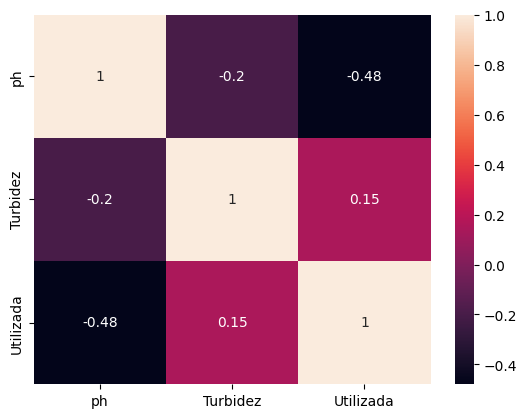

In [ ]:
import seaborn as sns
sns.heatmap(df[['ph', 'Turbidez', 'Utilizada']].corr(), annot=True)

Con esta tabla que nos muestra el mapa de calor de las correlaciónes de las variables nos puede ayudar a hacer un análisis multivariante.

Objetivos del Análisis Multivariante
- Explorar Relaciones:Examinar cómo las variables están relacionadas entre sí. Esto puede incluir la identificación de correlaciones y la evaluación de cómo una variable puede influir en otra.
- Reducir Dimensionalidad:Simplificar un conjunto de datos con muchas variables manteniendo la mayor cantidad de información posible. Técnicas como PCA (Análisis de Componentes Principales) se utilizan para lograr esto. En nuestro caso tenemos muy pocos datos.
- Clasificación y Agrupación:Agrupar o clasificar observaciones basadas en múltiples características. Métodos como k-means y análisis de clúster son ejemplos de esto. En nuestro caso no hará falta.
- Modelar Interacciones: Construir modelos que representen cómo múltiples variables influyen en una variable dependiente. Esto es común en la regresión múltiple y otros modelos predictivos.

# YData_Profiling

Con la herramienta ydata_profiling podemos obtener un analisis profundo de cada una de las variables de nuestro datasets, incluyendo representaciones visuales.

In [ ]:
pip install ydata_profiling

In [ ]:
from ydata_profiling import ProfileReport
df.profile_report()

# PyCaret

Con la herramienta PyCaret podemos obtener un analisis de nuestro dataset que nos muestra los diferentes modelos predictivos que podriamos utilizar. En nuestro caso nuestra label (Variable a predecir) es 'Utilizada' y ya sabemos que solo tiene valores 0/1. En caso de que nuestro label fuese una  variable continua tendriamos que usar modelos de regresion, pero en nuestro caso podemos usar ambos para ver cual tiene mejor precisión

In [ ]:
pip install pycaret

In [ ]:
df.head()

,ID,Fecha/hora inicio,ph,Turbidez,Utilizada,Frecuencia
0,24064,4/21/24 0:30,0.122137,0.164420,1,2
1,24014,2/8/24 0:30,0.244275,0.469003,1,1
2,24057,4/14/24 0:30,0.259542,0.207547,1,2
3,23081,9/10/23 5:00,0.251908,0.250674,1,1
4,23127,11/26/23 0:30,0.190840,0.277628,1,2


Nos quedamos solo con las columnas que queremos usar para las predicciones

In [ ]:
df = df[['ph', 'Turbidez', 'Utilizada']]
df.head()

,ph,Turbidez,Utilizada
0,0.122137,0.164420,1
1,0.244275,0.469003,1
2,0.259542,0.207547,1
3,0.251908,0.250674,1
4,0.190840,0.277628,1


## Modelos de regresion:

In [ ]:
from pycaret.regression import setup, compare_models

# Preparar el entorno para PyCaret en modo de regresión
reg_setup = setup(data=df, target='Utilizada', preprocess=True)
best_model = compare_models()

,Description,Value
0,Session id,1114
1,Target,Utilizada
2,Target type,Regression
3,Original data shape,"(163, 3)"
4,Transformed data shape,"(163, 3)"
5,Transformed train set shape,"(114, 3)"
6,Transformed test set shape,"(49, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.1018,0.0604,0.2205,0.6551,0.1495,0.0623,0.1150
rf,Random Forest Regressor,0.1473,0.0786,0.2566,0.5481,0.1750,0.0981,0.1510
gbr,Gradient Boosting Regressor,0.1432,0.0946,0.2778,0.4666,0.1885,0.0966,0.1150
xgboost,Extreme Gradient Boosting,0.1241,0.0983,0.2725,0.4454,0.1846,0.0909,0.0760
ada,AdaBoost Regressor,0.2399,0.1073,0.3075,0.3915,0.2006,0.2089,0.0590
dt,Decision Tree Regressor,0.1053,0.1053,0.2613,0.3893,0.1812,0.0694,0.0210
knn,K Neighbors Regressor,0.2367,0.1309,0.3478,0.2788,0.2423,0.1354,0.0240
lightgbm,Light Gradient Boosting Machine,0.2690,0.1427,0.3606,0.2155,0.2480,0.1799,0.1630
omp,Orthogonal Matching Pursuit,0.2970,0.1479,0.3704,0.1708,0.2586,0.1888,0.0180
lar,Least Angle Regression,0.2999,0.1486,0.3714,0.1659,0.2593,0.1920,0.0200


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

| **Columna**     | **Descripción**                                                                                             |
|-----------------|-------------------------------------------------------------------------------------------------------------|
| **Model**       | Nombre del modelo de regresión evaluado.                                                                     |
| **MAE**         | _Mean Absolute Error_: Promedio de los errores absolutos entre las predicciones y los valores reales.         |
| **MSE**         | _Mean Squared Error_: Promedio de los errores al cuadrado, penalizando más los errores grandes.               |
| **RMSE**        | _Root Mean Squared Error_: Raíz cuadrada del MSE, medida de la dispersión de los errores.                    |
| **R2**          | _Coefficient of Determination_: Proporción de la varianza explicada por el modelo, valor de 1 indica ajuste perfecto. |
| **RMSLE**       | _Root Mean Squared Logarithmic Error_: Error en escala logarítmica, útil cuando los datos tienen grandes rangos. |
| **MAPE**        | _Mean Absolute Percentage Error_: Error absoluto promedio expresado como un porcentaje del valor real.        |
| **TT (Sec)**    | Tiempo de entrenamiento del modelo en segundos (_Training Time_).                                             |


## Modelos de clasificación

In [ ]:
from pycaret.classification import setup, compare_models

# Preparar el entorno para PyCaret
clf_setup = setup(data=df, target='Utilizada', preprocess=True)

# Comparar modelos
best_model = compare_models()

,Description,Value
0,Session id,6507
1,Target,Utilizada
2,Target type,Binary
3,Original data shape,"(163, 3)"
4,Transformed data shape,"(163, 3)"
5,Transformed train set shape,"(114, 3)"
6,Transformed test set shape,"(49, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9477,0.9750,0.9778,0.9609,0.9677,0.8234,0.8434,0.1530
ada,Ada Boost Classifier,0.9295,0.9089,0.9667,0.9509,0.9558,0.7671,0.7958,0.2790
rf,Random Forest Classifier,0.9288,0.9028,0.9556,0.9600,0.9547,0.7790,0.8054,0.1860
gbc,Gradient Boosting Classifier,0.9212,0.8796,0.9667,0.9418,0.9510,0.7296,0.7633,0.2050
xgboost,Extreme Gradient Boosting,0.9205,0.9204,0.9667,0.9384,0.9507,0.7343,0.7575,0.0460
lightgbm,Light Gradient Boosting Machine,0.9030,0.9056,0.9556,0.9276,0.9402,0.6694,0.6894,0.1930
dt,Decision Tree Classifier,0.9023,0.8583,0.9333,0.9509,0.9358,0.7092,0.7475,0.0300
qda,Quadratic Discriminant Analysis,0.8773,0.8022,0.9889,0.8809,0.9293,0.4472,0.4833,0.0320
nb,Naive Bayes,0.8682,0.7837,0.9889,0.8727,0.9246,0.3851,0.4163,0.0260
svm,SVM - Linear Kernel,0.8598,0.8326,0.9778,0.8677,0.9182,0.3930,0.4182,0.0260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

| **Métrica**   | **Descripción**                                                                                                       |
|---------------|-----------------------------------------------------------------------------------------------------------------------|
| **Accuracy**  | Proporción de predicciones correctas sobre el total.                                                                  |
| **AUC**       | Área bajo la curva ROC, mide la capacidad de discriminar entre clases.                                                |
| **Recall**    | Proporción de positivos correctamente identificados.                                                                 |
| **Precision** | Proporción de verdaderos positivos entre los predichos como positivos.                                                |
| **F1**        | Media armónica entre precisión y recall, balance entre ambas.                                                         |
| **Kappa**     | Grado de acuerdo ajustado por el azar entre predicciones y reales.                                                    |
| **MCC**       | Correlación entre las predicciones y las etiquetas reales.                                                           |
| **TT (Sec)**  | Tiempo de entrenamiento del modelo en segundos (_Training Time_).                                                     |
